In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv("Downloads/credit_card_churn.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.isna()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [10]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [11]:
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if df[col].isnull().sum()!=0:
            df[col].fillna('missing',inplace=True)
    if df[col].dtype != 'object':
        if df[col].isnull().sum()!=0:
            df[col].fillna(0,inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [12]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        df[col]=l.fit_transform(df[col])

In [13]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,6,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,2,3,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [14]:
from feature_engine.selection import DropConstantFeatures,DropCorrelatedFeatures,DropDuplicateFeatures
from sklearn.pipeline import Pipeline
pip=Pipeline([('Constant',DropConstantFeatures(tol=0.99)),('Duplicate',DropDuplicateFeatures()),('Correlated',DropCorrelatedFeatures())])
df1=pip.fit_transform(df)

In [15]:
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,2.175,816,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,0.703,15476,0.857,0.462
10123,710638233,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,0.804,8764,0.683,0.511
10124,716506083,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,0.819,10291,0.818,0.000
10125,717406983,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,0.535,8395,0.722,0.000


In [16]:
df1.shape

(10127, 19)

In [17]:
x=df1.drop('Attrition_Flag',axis=1)
y=df1['Attrition_Flag']

In [18]:
x

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,818770008,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,713982108,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,769911858,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,709106358,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,2.175,816,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,0.703,15476,0.857,0.462
10123,710638233,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,0.804,8764,0.683,0.511
10124,716506083,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,0.819,10291,0.818,0.000
10125,717406983,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,0.535,8395,0.722,0.000


In [19]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [21]:
import evalml
from evalml.preprocessing import split_data
xtrain,xtest,ytrain,ytest=split_data(x,y,problem_type='binary')
evalml.problem_types.ProblemTypes

<enum 'ProblemTypes'>

In [22]:
from evalml.automl import AutoMLSearch

In [23]:
auto=AutoMLSearch(xtrain,ytrain,problem_type='binary')
auto.search()

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + Standard Scaler': '00:10',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler': '00:04',
  'Total time of batch': '00:15'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + Standard Scaler + RF Classifier Select From Model': '00:04',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + RF Classifier Select From Model': '00:05',
  'Total time of batch': '00:10'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + Select Columns Transformer': '00:03',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + Select Columns Transformer': '00:03',
  'Extra Trees Classifier w/ Label Encoder + Repla

In [24]:
auto.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.114118,0.114118,0.013240,97.944231,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.116881,0.116881,0.007600,97.894455,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.205791,0.205791,0.008247,96.292796,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.225574,0.225574,0.005196,95.936419,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.302528,0.302528,0.005884,94.550131,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Logistic Regression Classifier w/ Label Encode...,1,0.310252,0.310252,0.002811,94.410980,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,3,Logistic Regression Classifier w/ Label Encode...,3,0.317386,0.317386,0.010054,94.282465,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.324716,0.324716,0.002866,94.150430,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,5,Decision Tree Classifier w/ Label Encoder + Re...,5,0.475492,0.475492,0.086873,91.434284,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.545176,0.545176,0.002878,90.178970,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [25]:
auto.describe_pipeline(auto.rankings.iloc[1]['id'])


*********************************************************************************************************************************
* XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Oversampler + Select Columns Transformer *
*********************************************************************************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
5. Select Columns Transformer
	 * columns : ['Customer_Age', 'Total_Relationship_Count', 'Months_Ina

In [26]:
best=auto.best_pipeline

In [27]:
best.score(xtest,ytest,objectives=['auc','precision','recall','f1'])

OrderedDict([('AUC', 0.9861185727852395),
             ('Precision', 0.9687137891077636),
             ('Recall', 0.9829512051734274),
             ('F1', 0.9757805660927925)])

# KMeans Clustering

In [29]:
x=df1.iloc[:,:].values
x

array([[7.68805383e+08, 1.00000000e+00, 4.50000000e+01, ...,
        1.14400000e+03, 1.62500000e+00, 6.10000000e-02],
       [8.18770008e+08, 1.00000000e+00, 4.90000000e+01, ...,
        1.29100000e+03, 3.71400000e+00, 1.05000000e-01],
       [7.13982108e+08, 1.00000000e+00, 5.10000000e+01, ...,
        1.88700000e+03, 2.33300000e+00, 0.00000000e+00],
       ...,
       [7.16506083e+08, 0.00000000e+00, 4.40000000e+01, ...,
        1.02910000e+04, 8.18000000e-01, 0.00000000e+00],
       [7.17406983e+08, 0.00000000e+00, 3.00000000e+01, ...,
        8.39500000e+03, 7.22000000e-01, 0.00000000e+00],
       [7.14337233e+08, 0.00000000e+00, 4.30000000e+01, ...,
        1.02940000e+04, 6.49000000e-01, 1.89000000e-01]])

In [30]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
Y=model.fit_predict(x)

In [31]:
Y

array([2, 3, 0, ..., 4, 4, 0])

Elbow Method

Text(0, 0.5, 'WCSS')

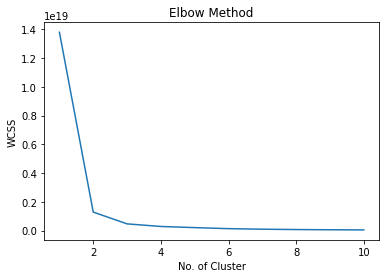

In [32]:
n=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(x)
    n.append(kmean.inertia_)
plt.plot(range(1,11),n)
plt.title('Elbow Method')
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS")

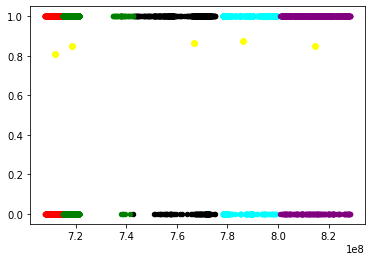

In [33]:
plt.scatter(x[Y==0, 0], x[Y==0,1], c='red', s=20, label='Cluster-0')
plt.scatter(x[Y==1, 0], x[Y==1,1], c='cyan', s=20, label='Cluster-1')
plt.scatter(x[Y==2, 0], x[Y==2,1], c='black', s=20, label='Cluster-2')
plt.scatter(x[Y==3, 0], x[Y==3,1], c='purple', s=20, label='Cluster-3')
plt.scatter(x[Y==4, 0], x[Y==4,1], c='green', s=20, label='Cluster-4')

#plot
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='yellow')

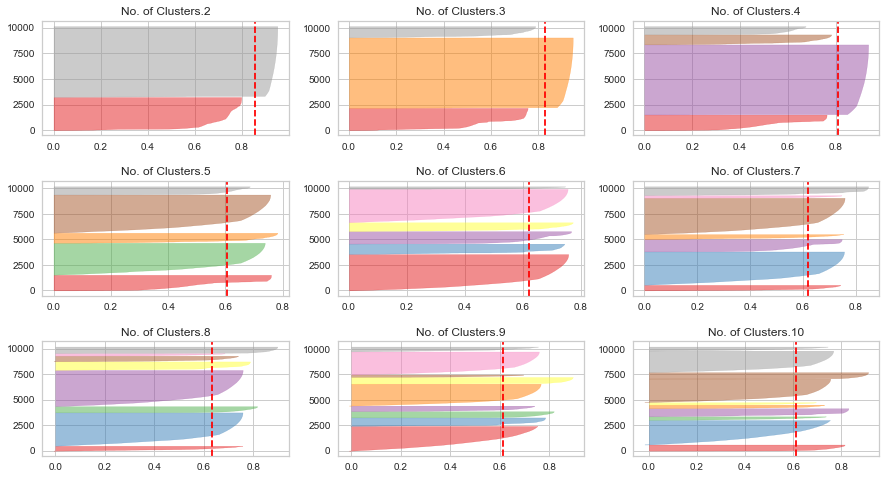

In [34]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3,3, figsize=(15,8))
ax = ax.ravel() #ax is 2D ravel will convert it into 1D
plt.subplots_adjust(hspace=0.4)
m=0
for i in [2,3,4,5,6,7,8,9,10]:
    km=KMeans(n_clusters=i, init='k-means++', random_state=0)
    ax[m].set_title("No. of Clusters.{}".format(i))
    vis=SilhouetteVisualizer(km, ax=ax[m])
    m=m+1
    vis.fit(x)

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(x,Y)

0.6049227378284162

# DBSCAN Algorithm

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph, NearestNeighbors

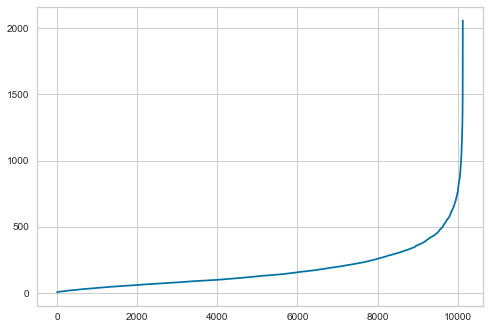

In [65]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df1)
distances, indices = neighbors_fit.kneighbors(df1)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)